In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn




## Project Objective
This project explores how customers actually behave while shopping on an e-commerce platform.  
Using data from 3,900 customers, the analysis focuses on understanding:

- How much customers spend and what influences their spending
- Which products and categories drive the most revenue
- Whether discounts, subscriptions, and shipping choices affect purchase behavior
- Patterns that differentiate one type of customer from another

## Importing Libraries
We import essential Python libraries for:
- Data manipulation (pandas, numpy)
- Data visualization (matplotlib, seaborn)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Loading the Dataset
The dataset is loaded into a pandas DataFrame for analysis.


In [3]:
df = pd.read_csv("Customer Purchase Behavior.csv")


## Initial Data Preview
The first few rows help us understand:
- Column names
- Data types
- Example values
- Overall structure of the dataset


In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Dataset Size
This shows the number of rows (observations) and columns (features) present in the dataset.


In [5]:
df.shape

(3900, 19)

## Dataset Structure

- Data types of each column
- Presence of missing values
- Memory usage

Key observations:
- Numerical features: Age, Purchase Amount, Previous Purchases
- Categorical features: Gender, Category, Location, Payment Method, etc.
- Review Rating contains missing values


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3860 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

## Duplicate Value Check

The dataset was checked for duplicate records to ensure data integrity.  
Duplicate rows can distort analysis results by overrepresenting certain observations.

No duplicates were found.


In [7]:
df.duplicated().sum()



np.int64(0)

## Missing Value Analysis
check for missing values to decide whether data cleaning or imputation is required.
Only the Review Rating column contains missing values.


In [8]:
df.isnull().sum()

Customer ID                  0
Age                          0
Gender                       0
Item Purchased               0
Category                     0
Purchase Amount (USD)        0
Location                     0
Size                         0
Color                        0
Season                       0
Review Rating               40
Subscription Status          0
Payment Method               0
Shipping Type                0
Discount Applied             0
Promo Code Used              0
Previous Purchases           0
Preferred Payment Method     0
Frequency of Purchases       0
dtype: int64

## Summary Statistics – Numerical Features
This provides statistical insights such as:
- Mean, median, and standard deviation
- Minimum and maximum values
- Distribution spread of numerical variables


In [9]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3860.000000,3900,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.748005,NaN,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716202,NaN,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


## Handling Missing Values in Review Rating

The `Review Rating` column contains missing values. A common approach is to replace missing values using the mean or median.  
However, using a **single overall median** for all missing values would introduce bias into the dataset.

### Why overall median is a bad idea
Review ratings vary significantly across product categories. For example:
- Clothing items may generally receive different ratings compared to footwear
- Customer expectations differ by category

If we apply one global median, we incorrectly force:
- Clothing items to inherit ratings influenced by footwear
- Footwear items to inherit ratings influenced by clothing

This distorts category-level patterns and reduces the reliability of the analysis.

### Chosen Approach: Category-wise Median Imputation
To preserve realistic rating behavior, missing values are imputed using the **median review rating within each product category**.

- If a clothing item is missing a rating, it is replaced with the median rating of clothing items
- If a footwear item is missing a rating, it is replaced with the median rating of footwear items

### Why this approach is better
- Median is robust to outliers
- Preserves category-specific customer behavior
- Minimizes bias introduced during imputation
- Maintains the integrity of downstream analysis

This approach ensures that missing values are filled in a way that reflects actual customer rating patterns rather than forcing artificial uniformity across categories.


In [10]:
df['Review Rating'] = df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median()))

In [11]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

## Column Standardization

Column names were converted to snake_case to improve readability, maintain naming consistency, and align with Python and pandas best practices.


In [12]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [13]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')

## Creating Age Groups

A new column, `age_group`, was created to segment customers into meaningful age categories:
- Young Adult
- Adult
- Middle Age
- Senior

This transformation helps simplify analysis, improves interpretability, and allows customer behavior to be compared across different life stages rather than individual ages.


In [14]:
labels = ['Young Adult','Adult','Middle Age','Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels= labels)

In [15]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle Age
1,19,Young Adult
2,50,Middle Age
3,21,Young Adult
4,45,Middle Age
5,46,Middle Age
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle Age


## Converting Purchase Frequency to Numerical Format

The purchase frequency column contains text values with overlapping meanings
(e.g., Fortnightly and Bi-Weekly, Quarterly and Every 3 Months).

To enable meaningful analysis, these values were standardized and converted into
`purchase_frequency_days`, representing the approximate number of days between purchases.

This approach removes ambiguity, preserves behavioral intent, and makes customer
frequency comparable across the dataset.


In [16]:
frequency_mapping = {
    'Weekly': 7,
    'Bi-Weekly': 14,
    'Fortnightly': 14,
    'Monthly': 30,
    'Quarterly': 90,
    'Every 3 Months': 90,
    'Annually': 365}


df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)


In [17]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
5,7,Weekly
6,90,Quarterly
7,7,Weekly
8,365,Annually
9,90,Quarterly


## Redundancy Check: discount_applied vs promo_code_used

Although discounts can theoretically be applied without promo codes
(e.g., seasonal or member-exclusive offers), the dataset was validated
to confirm whether this distinction actually exists.

Cross-tabulation and row-wise comparison show that:
- Every time a promo code was used, a discount was applied
- No discounts exist without a promo code
- Both columns match exactly for all 3,900 records

Since the columns are 100% identical, one of them is redundant and does
not add additional business value. To maintain a clean and efficient
dataset, only one column is retained for further analysis.


In [18]:
# Cross-tabulation to compare both columns
pd.crosstab(df['promo_code_used'], df['discount_applied'])


discount_applied,No,Yes
promo_code_used,,
No,2223,0
Yes,0,1677


In [19]:
# Check if both columns are identical
(df['promo_code_used'] == df['discount_applied']).value_counts()


True    3900
Name: count, dtype: int64

In [20]:
df = df.drop(columns=['promo_code_used'])

In [21]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'previous_purchases',
       'preferred_payment_method', 'frequency_of_purchases', 'age_group',
       'purchase_frequency_days'],
      dtype='object')

## Transition to Exploratory Data Analysis (EDA)

The initial data inspection and preprocessing steps have been completed, including
data cleaning, feature standardization, and basic validation checks.

With the dataset now structured and analysis-ready, the focus shifts to
exploratory data analysis and visualization to uncover patterns, relationships,
and actionable insights from the data.


## Visualization Theme

A consistent visualization theme is applied across the entire project to
ensure clarity, readability, and professional presentation.

- Neutral light background for reduced visual strain
- Dark gridlines and text for high contrast
- A unified `GnBu` color palette for all charts

This approach maintains visual consistency across analyses and keeps the
focus on insights rather than decorative styling.


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set global seaborn theme
sns.set_theme(
    style='darkgrid',
    context='talk',
    rc={
        'axes.facecolor': '#EAEAF2',
        'figure.facecolor': '#EAEAF2',
        'grid.alpha': 0.6,
        'text.color': '#2E2E2E',
        'axes.labelcolor': '#2E2E2E',
        'xtick.color': '#2E2E2E',
        'ytick.color': '#2E2E2E'
    }
)

# Define a consistent color palette for the entire project
palette = sns.color_palette('GnBu', n_colors=6)
base_palette = sns.color_palette('GnBu', n_colors=5)
accent_color = '#2E7D32'
palette = base_palette + [accent_color]

## Total Revenue by Gender

Total revenue was calculated by summing purchase amounts for each gender.
This analysis helps identify how revenue contribution differs between
male and female customers.

A bar chart is used as it provides a clear and direct comparison of
aggregated revenue across categorical groups.


In [23]:
# Aggregate revenue by gender
revenue_by_gender = (
    df
    .groupby("gender", as_index=False)["purchase_amount"]
    .sum()
)
revenue_by_gender

,gender,purchase_amount
0,Female,75191
1,Male,157890


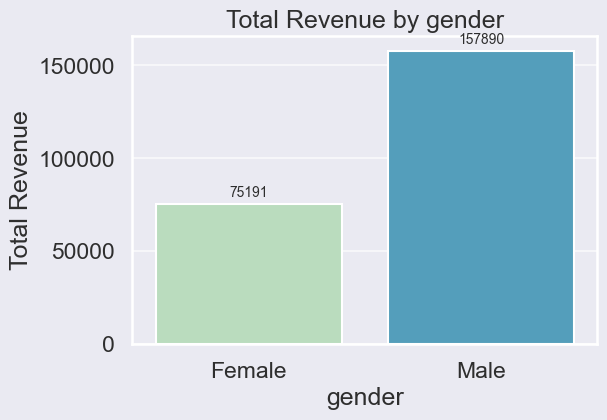

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt



# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(
    x="gender",
    y="purchase_amount",
    data=revenue_by_gender,
    hue="gender",
    palette="GnBu",
    legend=False
)

# Add exact value labels on top of bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.0f",        # remove decimals
        padding=3,
        fontsize=10
    )

plt.title("Total Revenue by gender")
plt.xlabel("gender")
plt.ylabel("Total Revenue")
plt.show()


## Customers Using Discounts but Spending Above Average

This analysis identifies customers who used a discount but still spent more than the overall average purchase amount.
These customers represent high-value buyers who are less sensitive to price reductions.
Understanding this group helps businesses design targeted loyalty programs instead of relying on broad discounts.


In [25]:
# Calculate overall average purchase amount
avg_purchase_amount = df["purchase_amount"].mean()

# Filter customers who used discount but spent above average
high_value_discount_customers = df[
    (df["discount_applied"] == "Yes") &
    (df["purchase_amount"] > avg_purchase_amount)
]

high_value_discount_customers.head()


,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,previous_purchases,preferred_payment_method,frequency_of_purchases,age_group,purchase_frequency_days
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly,Young Adult,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly,Middle Age,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly,Young Adult,7
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,49,Cash,Quarterly,Senior,90
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,8,Venmo,Annually,Young Adult,365


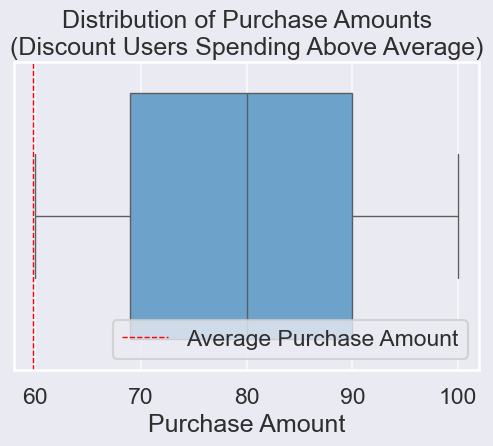

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.boxplot(
    x=high_value_discount_customers["purchase_amount"],
    color="#5DA5DA"
)

# Reference line for average purchase amount
plt.axvline(
    avg_purchase_amount,
    color="red",
    linestyle="--",
    linewidth=1,
    label="Average Purchase Amount"
)

plt.title("Distribution of Purchase Amounts\n(Discount Users Spending Above Average)")
plt.xlabel("Purchase Amount")
plt.legend()
plt.show()


## Top 5 Products with the Highest Average Review Rating

This analysis identifies the top 5 products with the highest average customer review ratings.
Average ratings are calculated for each product to understand overall customer satisfaction.
Focusing on the top-rated products helps businesses identify items with strong customer approval.
A bar chart is used to clearly compare average ratings across products.

In [27]:
# Calculate average review rating per product
top_rated_products = (
    df
    .groupby("item_purchased", as_index=False)["review_rating"]
    .mean()
    .round(2)
    .sort_values("review_rating", ascending=False)
    .head(5)
)

top_rated_products


,item_purchased,review_rating
6,Gloves,3.87
14,Sandals,3.84
8,Hat,3.80
3,Boots,3.80
7,Handbag,3.78


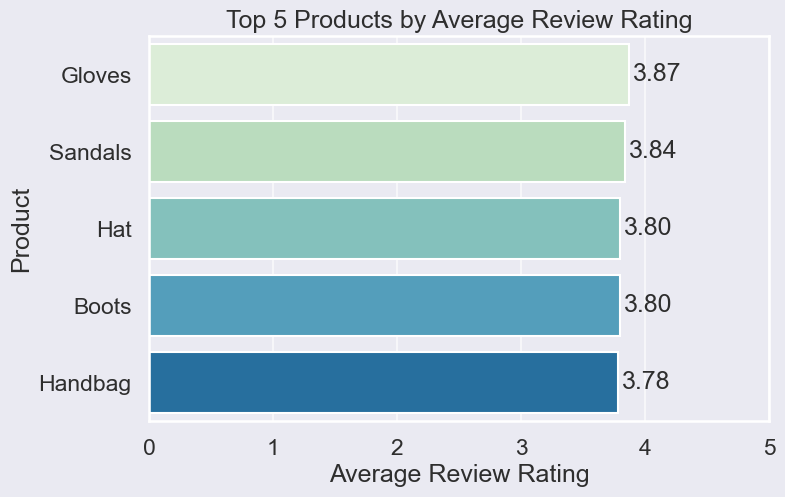

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=top_rated_products,
    y="item_purchased",
    x="review_rating",
    hue="item_purchased",
    palette="GnBu",
    legend=False
)

# Add value labels

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.title("Top 5 Products by Average Review Rating")
plt.xlabel("Average Review Rating")
plt.ylabel("Product")
plt.xlim(0, 5)   # ratings scale clarity
plt.show()


## Average Purchase Amount by Shipping Type

The average purchase amount was calculated for customers using Standard and
Express shipping to understand whether faster delivery is associated with
higher customer spending.

A bar chart is used to clearly compare the average purchase value across
shipping types.


In [29]:
avg_purchase_by_shipping = (
    df[df['shipping_type'].isin(['Standard', 'Express'])]
    .groupby('shipping_type', as_index=False)['purchase_amount']
    .mean()
)

# Round to 2 decimal places
avg_purchase_by_shipping['purchase_amount'] = avg_purchase_by_shipping['purchase_amount'].round(2)

avg_purchase_by_shipping


,shipping_type,purchase_amount
0,Express,60.48
1,Standard,58.46


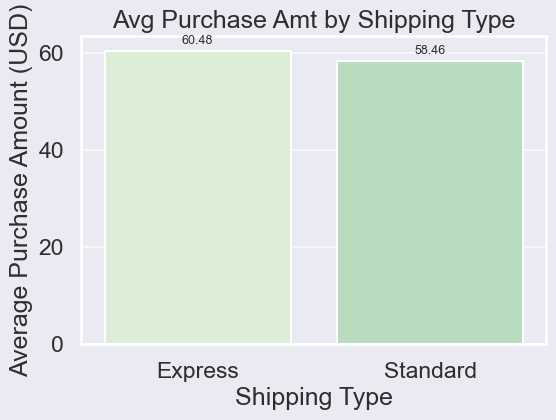

In [30]:
plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=avg_purchase_by_shipping,
    x='shipping_type',
    y='purchase_amount',
    hue='shipping_type',
    palette=palette[:2],
    legend=False
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.title('Avg Purchase Amt by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


## Average Spend by Subscription Status

A horizontal bar chart is used to compare the average purchase amount between
subscribed and non-subscribed customers.

This orientation improves readability and makes small differences in average
spend easier to interpret.


In [31]:
subscription_summary = (
    df.groupby('subscription_status')
      .agg(
          total_customers=('customer_id', 'count'),
          avg_spend=('purchase_amount', 'mean'),
          total_revenue=('purchase_amount', 'sum')
      )
      .reset_index()
)

# Round values for presentation
subscription_summary['avg_spend'] = subscription_summary['avg_spend'].round(2)
subscription_summary['total_revenue'] = subscription_summary['total_revenue'].round(2)

subscription_summary


,subscription_status,total_customers,avg_spend,total_revenue
0,No,2847,59.87,170436
1,Yes,1053,59.49,62645


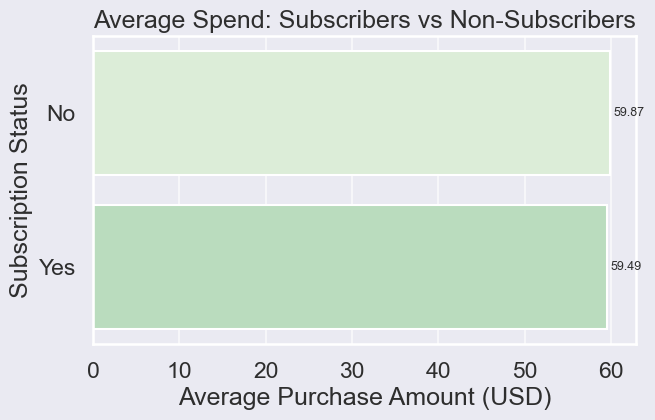

In [32]:
plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=subscription_summary,
    y='subscription_status',
    x='avg_spend',
    hue='subscription_status',
    palette=palette[:2],
    legend=False
)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.title('Average Spend: Subscribers vs Non-Subscribers')
plt.xlabel('Average Purchase Amount (USD)')
plt.ylabel('Subscription Status')
plt.show()


## Total Revenue by Subscription Status

Total revenue was compared between subscribed and non-subscribed customers
to understand which group contributes more to overall business performance.

A horizontal bar chart is used to clearly highlight differences in revenue
contribution across subscription segments.


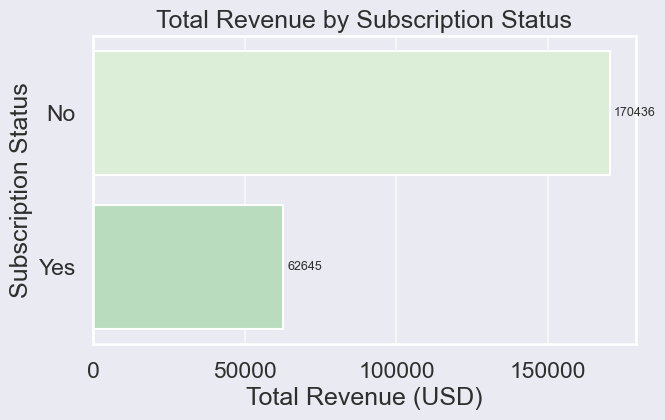

In [33]:
plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=subscription_summary,
    y='subscription_status',
    x='total_revenue',
    hue='subscription_status',
    palette=palette[:2],
    legend=False
)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=9)

plt.title('Total Revenue by Subscription Status')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Subscription Status')
plt.show()


## Customer Distribution by Subscription Status

To understand customer composition, the percentage of subscribed and
non-subscribed customers was calculated.

A donut chart is used to visualize how customers are distributed across
subscription status, making it easy to identify the dominant segment.


In [34]:
customer_share = (
    df['subscription_status']
    .value_counts()
    .reset_index()
)

customer_share.columns = ['subscription_status', 'customer_count']


In [35]:
customer_share['percentage'] = (
    customer_share['customer_count'] /
    customer_share['customer_count'].sum()
) * 100

customer_share


,subscription_status,customer_count,percentage
0,No,2847,73.0
1,Yes,1053,27.0


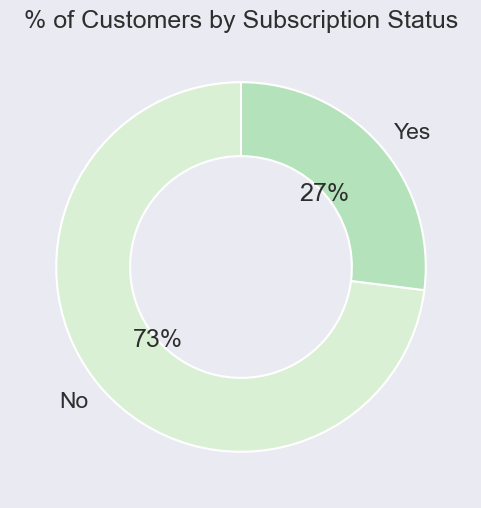

In [36]:
plt.figure(figsize=(6,6))

plt.pie(
    customer_share['percentage'],
    labels=customer_share['subscription_status'],
    autopct='%1.0f%%',
    startangle=90,
    colors=palette[:2],
    wedgeprops={'width': 0.4}
)

plt.title('% of Customers by Subscription Status')
plt.show()


## Top 5 Products with Highest Discount Purchase Percentage

The discount application rate was calculated for each product as the
percentage of purchases where a discount was applied.

The top five products with the highest discount rates were selected to
understand which items are most frequently sold under promotional pricing.

A lollipop chart is used as a clean alternative to a bar chart to clearly
rank products by discount dependency.


In [37]:
discount_rate_by_product = (
    df.groupby('item_purchased')
      .agg(
          discount_rate=(
              'discount_applied',
              lambda x: (x == 'Yes').mean() * 100
          )
      )
      .reset_index()
)

# Round values
discount_rate_by_product['discount_rate'] = discount_rate_by_product['discount_rate'].round(2)

# Top 5 products
top_5_discount_products = (
    discount_rate_by_product
    .sort_values('discount_rate', ascending=False)
    .head(5)
)

top_5_discount_products


,item_purchased,discount_rate
8,Hat,50.00
20,Sneakers,49.66
4,Coat,49.07
23,Sweater,48.17
13,Pants,47.37


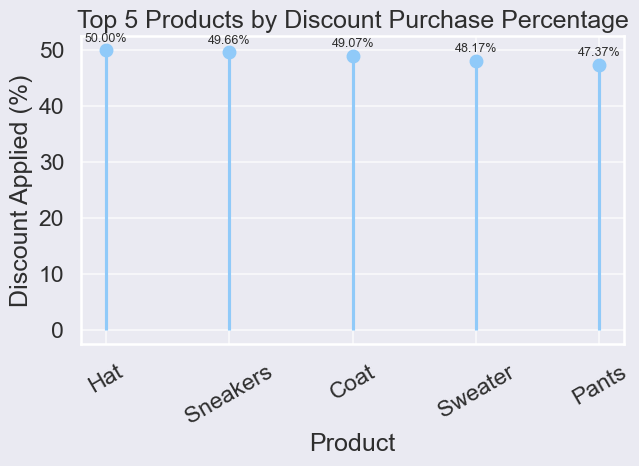

In [38]:
plt.figure(figsize=(7,4))

markerline, stemlines, baseline = plt.stem(
    top_5_discount_products['item_purchased'],
    top_5_discount_products['discount_rate'],
    basefmt=' ',
    linefmt='#90CAF9',
    markerfmt='o'
)

# Add percentage labels above markers
for x, y in zip(
    top_5_discount_products['item_purchased'],
    top_5_discount_products['discount_rate']
):
    plt.text(
        x,
        y + 1,                 # slight vertical offset
        f'{y:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Top 5 Products by Discount Purchase Percentage')
plt.xlabel('Product')
plt.ylabel('Discount Applied (%)')
plt.xticks(rotation=30)
plt.show()


## Customer Segmentation by Purchase History

Customers were segmented into New, Returning, and Loyal groups based on the
number of previous purchases.

The treemap visualizes the proportion of customers in each segment, where
larger areas represent higher customer counts. Color intensity is used to
highlight customer maturity, with darker shades indicating higher loyalty.


In [39]:
df['customer_segment'] = pd.cut(
    df['previous_purchases'],
    bins=[-1, 1, 5, float('inf')],
    labels=['New', 'Returning', 'Loyal']
)


In [40]:
segment_count = (
    df['customer_segment']
    .value_counts()
    .reset_index()
)

segment_count.columns = ['customer_segment', 'customer_count']
segment_count


,customer_segment,customer_count
0,Loyal,3476
1,Returning,341
2,New,83


In [41]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


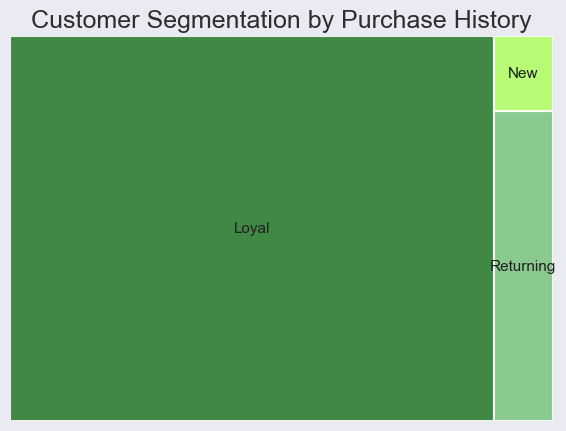

In [42]:
segment_colors = {
    'Loyal': '#2E7D32',       # dark green
    'Returning': '#81C784',   # medium green
    'New': "#B2FF66"          # light green
}

import squarify
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

squarify.plot(
    sizes=segment_count['customer_count'],
    label=segment_count['customer_segment'],
    color=[segment_colors[s] for s in segment_count['customer_segment']],
    alpha=0.9,
    text_kwargs={'fontsize': 11, 'color': '#1f1f1f'}
)

plt.title('Customer Segmentation by Purchase History')
plt.axis('off')
plt.show()


## Purchase Intensity by Customer Segment and Category

A heatmap is used to analyze how different customer segments contribute to
purchases across product categories.

This visualization highlights behavioral patterns by showing purchase intensity
at the intersection of customer loyalty and product category.


In [43]:
heatmap_data = (
    df.groupby(['customer_segment', 'category'], observed=True)
      .size()
      .reset_index(name='purchase_count')
)


In [44]:
heatmap_matrix = heatmap_data.pivot(
    index='customer_segment',
    columns='category',
    values='purchase_count'
)
heatmap_matrix

category,Accessories,Clothing,Footwear,Outerwear
customer_segment,,,,
New,28,28,15,12
Returning,106,154,48,33
Loyal,1106,1555,536,279


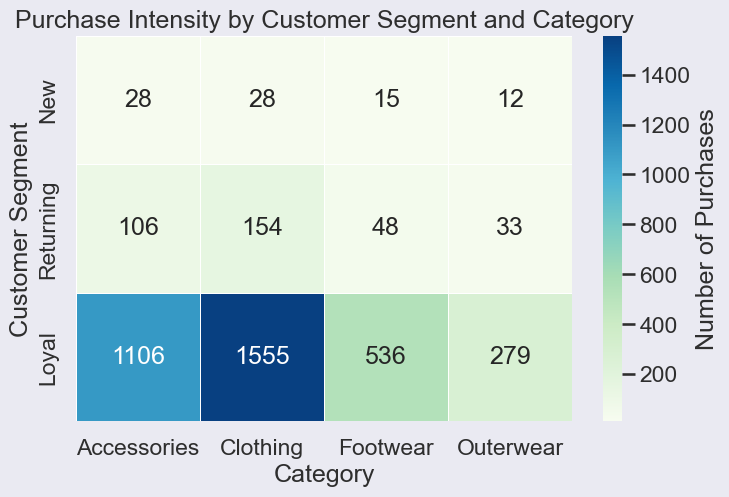

In [45]:
plt.figure(figsize=(8,5))

sns.heatmap(
    heatmap_matrix,
    annot=True,
    fmt='.0f',
    cmap='GnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Purchases'}
)

plt.title('Purchase Intensity by Customer Segment and Category')
plt.xlabel('Category')
plt.ylabel('Customer Segment')
plt.show()


## Purchase Intensity Across Customer Journey

A line chart is used to analyze how purchase activity evolves as customers move
through different loyalty stages: New, Returning, and Loyal.

Each line represents a product category, allowing comparison of growth patterns
across the customer lifecycle. This visualization highlights how customer value
increases with retention rather than acquisition alone.


In [46]:
segment_order = ['New', 'Returning', 'Loyal']

df['customer_segment'] = pd.Categorical(
    df['customer_segment'],
    categories=segment_order,
    ordered=True
)


In [47]:
line_data = (
    df.groupby(['customer_segment', 'category'], observed=True)
      .size()
      .reset_index(name='purchase_count')
)
line_data

,customer_segment,category,purchase_count
0,New,Accessories,28
1,New,Clothing,28
2,New,Footwear,15
3,New,Outerwear,12
4,Returning,Accessories,106
5,Returning,Clothing,154
6,Returning,Footwear,48
7,Returning,Outerwear,33
8,Loyal,Accessories,1106
9,Loyal,Clothing,1555


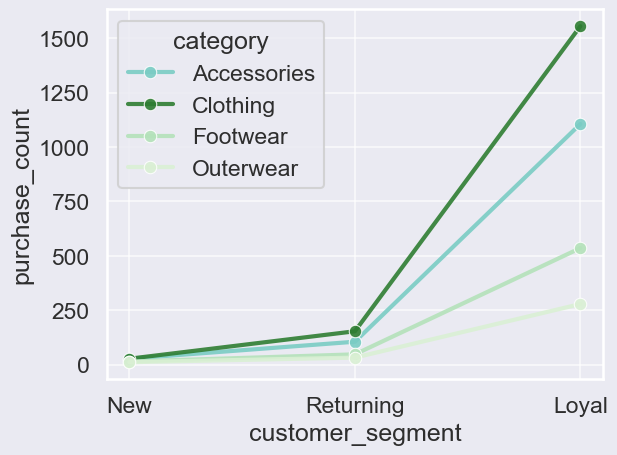

In [48]:
sns.lineplot(
    data=line_data,
    x='customer_segment',
    y='purchase_count',
    hue='category',
    marker='o',
    linewidth=3,
    alpha=0.9,
    palette=[
        palette[2],   # Accessories
        '#2E7D32',    # Clothing (accent color)
        palette[1],   # Footwear
        palette[0]    # Outerwear
    ]
)
plt.show()



## Purchase Frequency by Payment Method

This analysis examines whether customers using different payment methods
exhibit different purchase frequency patterns.

Purchase frequency is measured as the number of days between purchases.
A histogram is used to visualize the distribution of purchase frequency
across payment methods, allowing comparison of how often customers return
based on their preferred payment option.


In [49]:

top_payments = (
    df['payment_method']
    .value_counts()
    .index
)

df_hist = df[df['payment_method'].isin(top_payments)]
top_payments

Index(['Credit Card', 'Venmo', 'Cash', 'PayPal', 'Debit Card',
       'Bank Transfer'],
      dtype='object', name='payment_method')

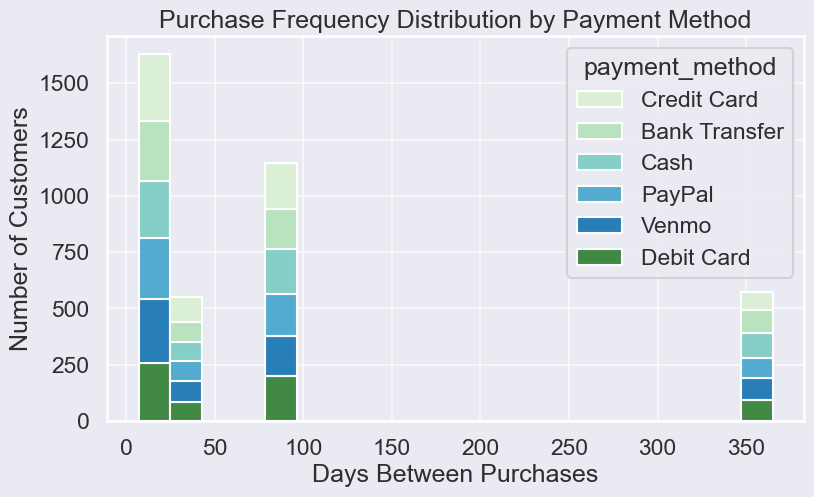

In [50]:
plt.figure(figsize=(9,5))

sns.histplot(
    data=df,
    x='purchase_frequency_days',
    hue='payment_method',
    bins=20,
    multiple='stack',
    palette=palette[:6],
    edgecolor='white',
    alpha=0.9
)

plt.title('Purchase Frequency Distribution by Payment Method')
plt.xlabel('Days Between Purchases')
plt.ylabel('Number of Customers')

plt.show()


## Average Purchase Amount by Age Group

Customers were segmented into four age groups to simplify analysis and
reduce noise from individual transactions.

A bubble chart is used to compare the average purchase amount across age
groups, where larger bubbles represent higher average spending. This
approach highlights spending differences in a clear and interpretable way.


In [51]:
labels = ['Young Adult', 'Adult', 'Middle Age', 'Senior']

df['age_group'] = pd.qcut(
    df['age'],
    q=4,
    labels=labels
)


In [52]:
age_spend = (
    df.groupby('age_group', observed=True)
      .agg(
          avg_purchase_amount=('purchase_amount', 'mean'),
          customer_count=('customer_id', 'count')
      )
      .reset_index()
)
age_spend

,age_group,avg_purchase_amount,customer_count
0,Young Adult,60.450389,1028
1,Adult,59.424628,942
2,Middle Age,60.037525,986
3,Senior,59.070975,944


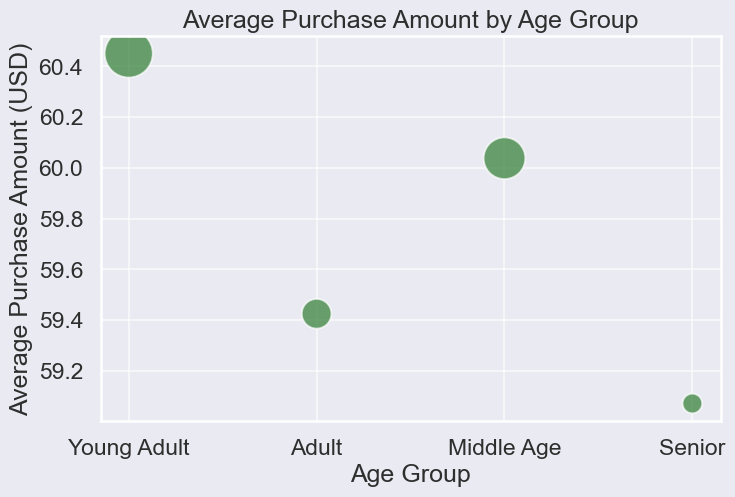

In [53]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    data=age_spend,
    x='age_group',
    y='avg_purchase_amount',
    size='avg_purchase_amount',
    sizes=(200, 1200),
    color='#2E7D32',
    alpha=0.7,
    legend=False
)

plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


# Insight Generation and Final Report

This analysis examined customer shopping behavior using data from 3,900
e-commerce customers to understand what drives spending, engagement,
and repeat purchases. The goal was to move beyond surface-level metrics
and identify behavioral patterns that can inform business decisions.

---

## Data Quality and Preparation Insights

- The dataset was largely clean, with no duplicate records detected,
  ensuring reliable aggregation and analysis.

- Missing values were present only in the `review_rating` column.
  Instead of applying a single global statistic, missing ratings were
  imputed using the **median rating within each product category**.
  This approach preserved category-level customer expectations and
  avoided introducing cross-category bias.

- Text-based purchase frequency values contained overlapping meanings
  (e.g., Fortnightly vs Bi-Weekly). These were standardized and converted
  into a numeric metric (`purchase_frequency_days`), enabling consistent
  behavioral analysis.

- A redundancy check confirmed that `discount_applied` and
  `promo_code_used` were 100% identical across all records. One column
  was removed to simplify the dataset and avoid unnecessary duplication.

---

## Customer Value and Revenue Drivers

- **Customer retention is the strongest driver of business value.**
  Loyal customers dominate the customer base and account for the
  majority of purchases across all product categories.

- Purchase activity increases sharply as customers progress from
  New → Returning → Loyal, demonstrating that customer value compounds
  over time rather than remaining static.

- **Subscribed customers generate disproportionate value.**
  Although subscribers represent a smaller share of total customers,
  they contribute significantly higher total revenue and show higher
  average spend per transaction.

- The large gap between subscriber revenue contribution and subscriber
  share highlights subscriptions as a high-impact lever for revenue
  growth.

---

## Product and Category-Level Insights

- **Clothing and Accessories are the strongest-performing categories.**
  These categories show the highest purchase intensity, particularly
  among loyal customers, indicating strong repeat demand.

- Top-rated products consistently receive higher customer satisfaction
  scores, making them ideal candidates for increased visibility,
  promotions, and recommendation placement.

- Some products show a high dependency on discounts to drive purchases,
  indicating price sensitivity or competitive pressure. These items
  require careful pricing and margin management.

---

## Discounts and Pricing Behavior

- A segment of customers used discounts while still spending **above
  the overall average purchase amount**.

- This pattern indicates that discounts, when applied strategically,
  can increase basket size rather than reduce revenue.

- High-spending discount users represent ideal candidates for loyalty
  rewards, bundles, and personalized offers instead of blanket discounts.

---

## Shipping and Payment Behavior

- Customers choosing **Express Shipping** have a higher average purchase
  value than those using Standard Shipping, suggesting lower price
  sensitivity and higher perceived urgency or value.

- Digital payment methods (Credit Card, PayPal, Venmo) are associated
  with **higher purchase frequency**, while Cash and Bank Transfer users
  show longer gaps between purchases.

- Payment convenience appears to be a key factor influencing customer
  engagement and repeat purchasing behavior.

---

## Demographic Insights

- Average purchase value remains relatively consistent across age groups,
  with only minor variation.

- While Young Adults and Middle-Aged customers show slightly higher
  average spending, the differences are not substantial.

- **Age is not a strong determinant of spending behavior**, indicating
  that behavioral segmentation is more effective than demographic-based
  targeting for pricing and promotions.

---

## Customer Segmentation and Behavioral Patterns

- The customer base is heavily retention-driven, with Loyal customers
  forming the largest segment.

- Returning customers represent the most valuable growth opportunity,
  as they already show engagement but have not yet reached peak value.

- New customers contribute minimally to total purchases, highlighting
  the importance of onboarding, early engagement, and conversion
  strategies.

- Across all analyses, customer behavior (loyalty, subscription status,
  frequency, and convenience choices) consistently explains spending
  patterns better than demographic attributes.

---

## Overall Conclusion

This analysis demonstrates that **customer behavior—not demographics—is
the primary driver of value in this dataset**. Revenue growth is best
achieved by focusing on retention, subscription adoption, convenience,
and targeted incentives rather than broad acquisition or blanket
discounting strategies.

---

## Business Recommendations

- Prioritize retention strategies that move customers from Returning
  to Loyal segments.

- Expand and promote subscription programs to non-subscribed customers.

- Apply discounts strategically to increase basket size among
  high-value customers rather than across all segments.

- Promote digital payment methods and express shipping to improve
  engagement and purchase frequency.

- Focus marketing and inventory strategies on high-performing
  categories such as Clothing and Accessories.

- Use behavioral segmentation as the primary framework for decision-
  making instead of demographic segmentation alone.
